In [1]:
#import sklearn
from sklearn import cluster, datasets, metrics, mixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from scipy import linalg

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

In [2]:
path = './data_for_analysis_2014/final_data_route_2014_q'
data_q1 = pd.read_csv(path+'1.csv')
data_q2 = pd.read_csv(path+'2.csv')
data_q3 = pd.read_csv(path+'3.csv')
data_q4 = pd.read_csv(path+'4.csv')

In [3]:
data_q1.equals(data_q2)

False

In [15]:
route = 0 # Route type; 0 - non-stop, 1 - one-stop, 2 - two or more

In [4]:
data_q3.head(5)
# print(len(data_q1))
# print(len(data_q2))
# print(len(data_q3))
# print(len(data_q4))
# data['AVG_PAX_log'] = np.log(data['AVG_PAX'].as_matrix())
# data_q1.set_index('ALL_POSSIBLE_ROUTES').join(data_q2.set_index('ALL_POSSIBLE_ROUTES'), lsuffix='_q1', rsuffix='_q2').head()

,ALL_POSSIBLE_ROUTES,AVG_NONSTOP_MILES,AVG_MKT_FARE,AVG_MKT_COUPONS,TOT_SEG_PAX,TOT_MKT_PAX,AVG_MARKET_MILES_0,AVG_MARKET_MILES_1,AVG_MARKET_MILES_2,MKT_PAX_0,MKT_PAX_1,MKT_PAX_2,AVG_MKT_FARE_0,AVG_MKT_FARE_1,AVG_MKT_FARE_2,MKT_COUPONS_0,MKT_COUPONS_1,MKT_COUPONS_2,LEG_CAR,LOW_CAR
0,1014010158,1782,282.500000,2.250000,0,5,0.0,2089.000000,2138.000000,0,4,1,0.000000,284.000000,278.000000,0,3,1,0,1
1,1014010257,1834,233.691589,2.056075,3,137,1834.0,1906.312500,2236.750000,3,126,8,105.000000,238.583333,223.250000,3,96,8,1,1
2,1014010279,0,0.000000,0.000000,4,0,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0
3,1014010299,2618,314.048387,2.427419,0,129,0.0,2853.527778,2953.750000,0,75,54,0.000000,322.944444,301.730769,0,72,52,1,1
4,1014010397,1269,243.825000,1.633333,2934,904,1269.0,1512.971671,1868.769231,421,470,13,291.675214,211.994334,246.846154,234,353,13,1,1


In [10]:
data_ns = data_q1.filter(items=['ALL_POSSIBLE_ROUTES'])#.set_index('ALL_POSSIBLE_ROUTES')
data_ns['MKT_PAX_0'] = data_q1.MKT_PAX_0.add(data_q2.MKT_PAX_0).add(data_q3.MKT_PAX_0).add(data_q4.MKT_PAX_0)
data_ns['MKT_PAX_1'] = data_q1.MKT_PAX_1.add(data_q2.MKT_PAX_1).add(data_q3.MKT_PAX_1).add(data_q4.MKT_PAX_1)
data_ns['MKT_PAX_2'] = data_q1.MKT_PAX_2.add(data_q2.MKT_PAX_2).add(data_q3.MKT_PAX_2).add(data_q4.MKT_PAX_2)
data_ns['AVG_NONSTOP_MILES'] = (data_q1.AVG_NONSTOP_MILES.add(data_q2.AVG_NONSTOP_MILES).
                                add(data_q3.AVG_NONSTOP_MILES).add(data_q4.AVG_NONSTOP_MILES))/4
data_ns['AVG_FARE_0'] = ((data_q1.AVG_MKT_FARE_0*data_q1.MKT_PAX_0).add(data_q2.AVG_MKT_FARE_0*data_q2.MKT_PAX_0).
                         add(data_q3.AVG_MKT_FARE_0*data_q3.MKT_PAX_0).add(data_q4.AVG_MKT_FARE_0*data_q4.MKT_PAX_0))/data_ns.MKT_PAX_0
data_ns['AVG_FARE_1'] = ((data_q1.AVG_MKT_FARE_1*data_q1.MKT_PAX_1).add(data_q2.AVG_MKT_FARE_1*data_q2.MKT_PAX_1).
                         add(data_q3.AVG_MKT_FARE_1*data_q3.MKT_PAX_1).add(data_q4.AVG_MKT_FARE_1*data_q4.MKT_PAX_1))/data_ns.MKT_PAX_1
data_ns['AVG_FARE_2'] = ((data_q1.AVG_MKT_FARE_2*data_q1.MKT_PAX_2).add(data_q2.AVG_MKT_FARE_2*data_q2.MKT_PAX_2).
                         add(data_q3.AVG_MKT_FARE_2*data_q3.MKT_PAX_2).add(data_q4.AVG_MKT_FARE_2*data_q4.MKT_PAX_2))/data_ns.MKT_PAX_2
data_ns['AVG_FARE_overall'] = (data_q1.AVG_MKT_FARE.add(data_q2.AVG_MKT_FARE).
                         add(data_q3.AVG_MKT_FARE).add(data_q4.AVG_MKT_FARE))/4
data_ns['MKT_PAX_0_log'] = np.log(data_ns['MKT_PAX_0'].as_matrix())
data_ns['MKT_PAX_1_log'] = np.log(data_ns['MKT_PAX_1'].as_matrix())
data_ns['MKT_PAX_2_log'] = np.log(data_ns['MKT_PAX_2'].as_matrix())

data_ns.set_index('ALL_POSSIBLE_ROUTES', inplace=True)

/home/roger/a/amaheshw/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/roger/a/amaheshw/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/roger/a/amaheshw/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


In [79]:
## Data Filtering
# (df["B"] > 50) & (df["C"] == 900)
data_ns = data_ns[(data_ns['MKT_PAX_0']>0) & (data_ns['MKT_PAX_1']>0) & (data_ns['MKT_PAX_2']>0)]
data_ns = data_ns[(data_ns['AVG_FARE_0']>50) & (data_ns['AVG_FARE_1']>50) & (data_ns['AVG_FARE_2']>50)]
print(len(data_ns))
data_ns.head()

3496


,MKT_PAX_0,MKT_PAX_1,MKT_PAX_2,AVG_NONSTOP_MILES,AVG_FARE_0,AVG_FARE_1,AVG_FARE_2,AVG_FARE_overall,MKT_PAX_0_log,MKT_PAX_1_log,MKT_PAX_2_log
ALL_POSSIBLE_ROUTES,,,,,,,,,,,
1014010257,17,430,27,1834.00,272.478992,273.814045,224.342593,271.432666,2.833213,6.063785,3.295837
1014010397,1599,1502,37,1269.00,279.476566,209.543950,277.162162,238.713973,7.377134,7.314553,3.610918
1014010423,224,2684,6,619.00,203.927917,237.641512,306.833333,234.964128,5.411646,7.895063,1.791759
1014010529,24,830,32,1886.00,244.432692,252.095983,213.187500,249.999533,3.178054,6.721426,3.465736
1014010599,26,315,1,1138.25,353.510256,265.206616,219.000000,274.337061,3.258097,5.752573,0.000000


In [5]:
# sep_data = {}
# sep_data[0] = data[data['ITIN_CHOICE']==0]
# sep_data[0] = sep_data[0][sep_data[0]['AVG_PAX']>0]
# # sep_data[0] = sep_data[0][sep_data[0]['AVG_FARE']>50]
# sep_data[0].set_index('ALL_POSSIBLE_ROUTES', inplace=True)

# sep_data[1] = data[data['ITIN_CHOICE']==1]
# sep_data[1] = sep_data[1][sep_data[1]['AVG_PAX']>0]
# # sep_data[1] = sep_data[1][sep_data[1]['AVG_FARE']>50]
# sep_data[1].set_index('ALL_POSSIBLE_ROUTES', inplace=True)

# sep_data[2] = data[data['ITIN_CHOICE']==2]
# sep_data[2] = sep_data[2][sep_data[2]['AVG_PAX']>0]
# # sep_data[2] = sep_data[2][sep_data[2]['AVG_FARE']>50]
# sep_data[2].set_index('ALL_POSSIBLE_ROUTES', inplace=True)

# # data1 = data[data['ITIN_CHOICE']==1]
# # data1 = data1[data1['AVG_PAX']>0]
# # data1.set_index('ALL_POSSIBLE_ROUTES', inplace=True)
# # data2 = data[data['ITIN_CHOICE']==2]
# # data2 = data2[data2['AVG_PAX']>0]
# # data2.set_index('ALL_POSSIBLE_ROUTES', inplace=True)
# sep_data[1].head(5)

,ITIN_CHOICE,AVG_FARE,AVG_UNIT_COST,AVG_PAX,AVG_NONSTOP_MILES,AVG_PAX_log
ALL_POSSIBLE_ROUTES,,,,,,
1014011298,1,208.176471,0.365864,37,569,3.610918
1014010397,1,220.571429,0.173815,357,1269,5.877736
1042312892,1,197.538144,0.159048,601,1242,6.398595
1014014683,1,248.338068,0.407780,488,609,6.190315
1072111298,1,200.884507,0.128607,769,1562,6.645091


In [110]:
# data_ns.filter(['AVG_FARE_0', 'AVG_FARE_overall', 'MKT_PAX_0_log', 'AVG_NONSTOP_MILES']).head(5)
# len(data_ns[data_ns['AVG_FARE_0']>50])

3496

## KMeans for Non-Stop Data

<IPython.core.display.Javascript object>


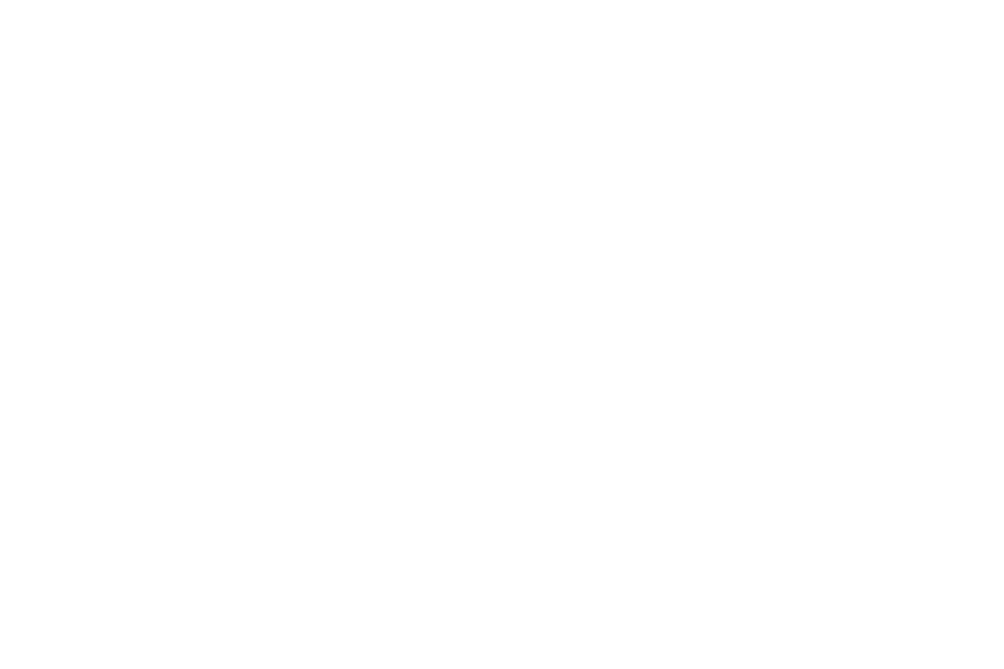

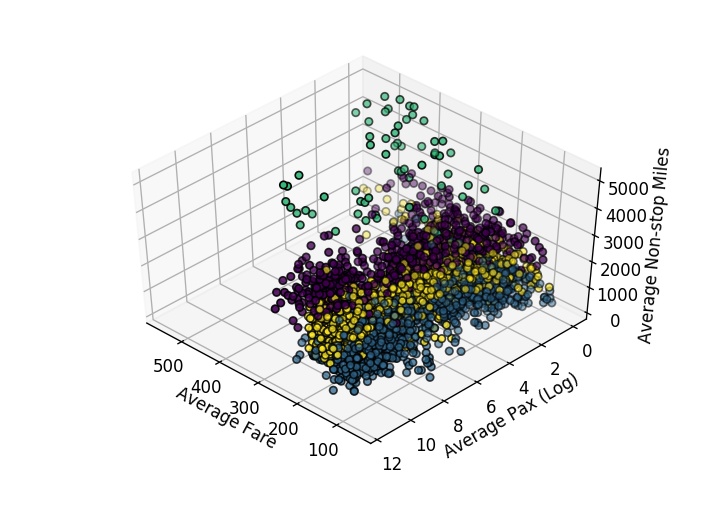

In [127]:
%matplotlib notebook
k_means = cluster.KMeans(n_clusters=4)
X_data = {}
# X_data[0] = data_ns.filter(['AVG_FARE_0', 'AVG_FARE_overall', 'MKT_PAX_0_log', 'AVG_NONSTOP_MILES']).as_matrix()
# X_data[1] = data_ns.filter(['AVG_FARE_1', 'AVG_FARE_overall', 'MKT_PAX_1_log', 'AVG_NONSTOP_MILES']).as_matrix()
# X_data[2] = data_ns.filter(['AVG_FARE_2', 'AVG_FARE_overall', 'MKT_PAX_2_log', 'AVG_NONSTOP_MILES']).as_matrix()
X_data[0] = data_ns.filter(['AVG_FARE_0', 'MKT_PAX_0_log', 'AVG_NONSTOP_MILES']).as_matrix()
X_data[1] = data_ns.filter(['AVG_FARE_1', 'MKT_PAX_1_log', 'AVG_NONSTOP_MILES']).as_matrix()
X_data[2] = data_ns.filter(['AVG_FARE_2', 'MKT_PAX_2_log', 'AVG_NONSTOP_MILES']).as_matrix()
# X_data[1] = sep_data[1].filter(['AVG_FARE','AVG_PAX_log','AVG_NONSTOP_MILES']).as_matrix()
# X_data[2] = sep_data[2].filter(['AVG_FARE','AVG_PAX_log','AVG_NONSTOP_MILES']).as_matrix()
# k_means.fit(X_data0)
# X_data0

fignum = 1
fig = plt.figure(fignum, dpi=120)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# k_means.fit(X_data[route])
k_means.fit(X_data[route])
labels = k_means.labels_
# print(labels)
# labels = k_means.labels_

ax.scatter(X_data[route][:, 0], X_data[route][:, 1], X_data[route][:, 2],
           c=labels.astype(np.float), edgecolor='k')
# plt.scatter(Xdata0_PCA, np.ones_like(Xdata0_PCA[:,0]), np.ones_like(Xdata0_PCA[:,0]), c=labels.astype(np.float))


# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Average Fare')
ax.set_ylabel('Average Pax (Log)')
ax.set_zlabel('Average Non-stop Miles')
# ax.set_title(titles[fignum - 1])
ax.dist = 12
plt.draw()
fignum = fignum + 1

## Gaussian Mixture for Non-Stop Data

In [124]:
def gmm(X, n_components_range):
    lowest_bic = np.infty
    bic = []
#     n_components_range = range(1, 5)
    cv_types = ['full']#, 'tied', 'diag']# 'spherical', 'tied', 'diag']

    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type, init_params='kmeans', verbose=0)
            gmm.fit(X)
#             bic.append(metrics.silhouette_score(X, gmm.predict(X), metric='euclidean'))
#             bic.append(metrics.calinski_harabaz_score(X, gmm.predict(X)))
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))

    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    if clf.covariance_type == 'full':
        for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                                   color_iter)):
#             import pdb; pdb.set_trace()
            v, w = linalg.eigh(cov)
            if not np.any(Y_ == i):
                continue

            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan2(w[0][1], w[0][0])
            angle = 180. * angle / np.pi  # convert to degrees
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180+angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(.5)
            splot.add_artist(ell)

        plt.xticks(())
        plt.yticks(())
    #     plt.title('Selected GMM: full model, 4 components')
        plt.subplots_adjust(hspace=.35, bottom=.02)
        plt.show()
    return clf

## Identifying the ideal number of components and Covariance type

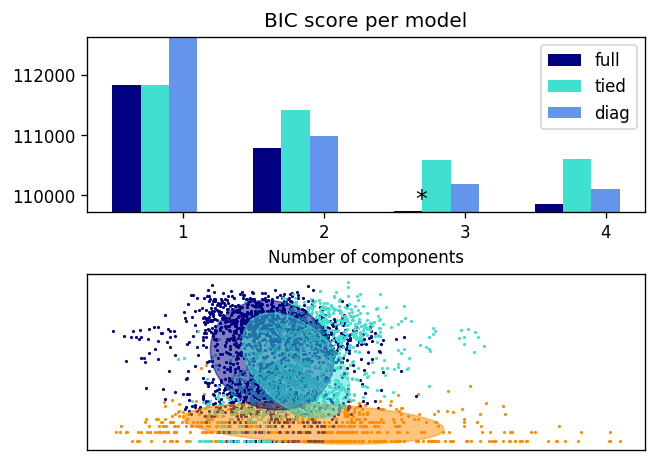

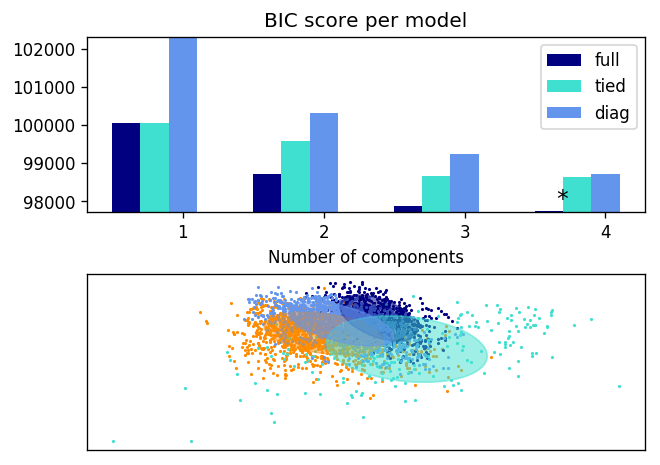

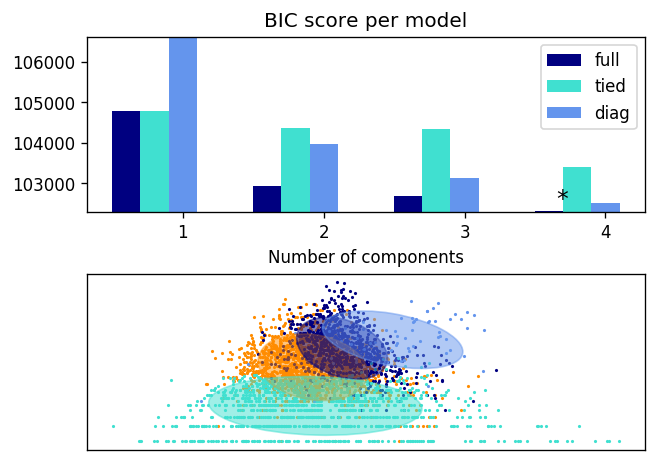

In [129]:
%matplotlib inline
clf={}

fig = plt.figure(fignum, dpi=120)
fignum += 1
clf[0] = gmm(X_data[0], range(1,5))

fig = plt.figure(fignum, dpi=120)
fignum += 1
clf[1] = gmm(X_data[1], range(1,5))

fig = plt.figure(fignum, dpi=120)
fignum += 1
clf[2] = gmm(X_data[2], range(1,5))

<IPython.core.display.Javascript object>


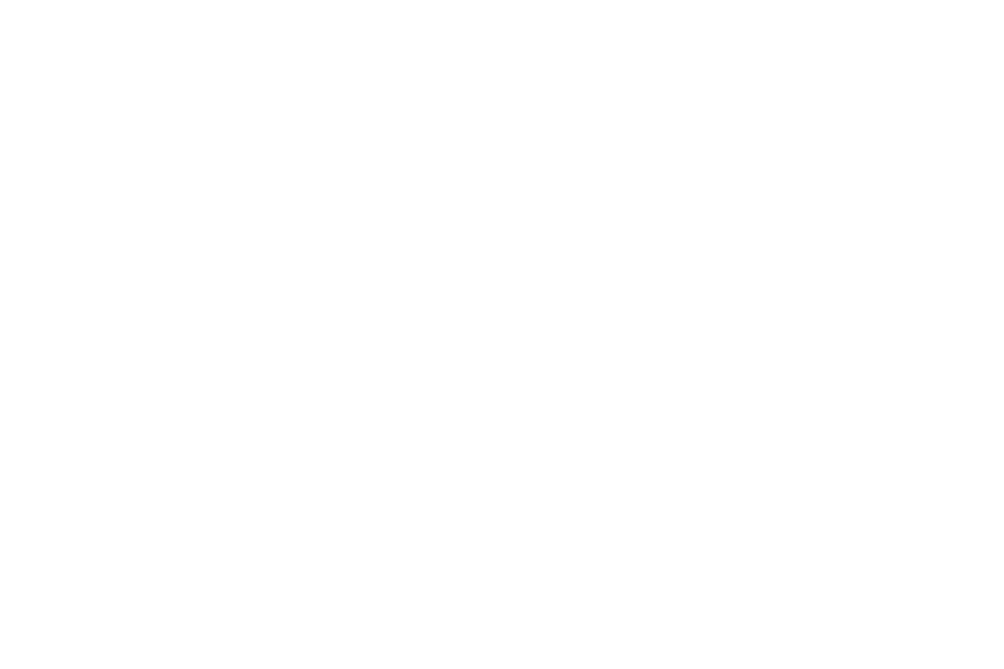

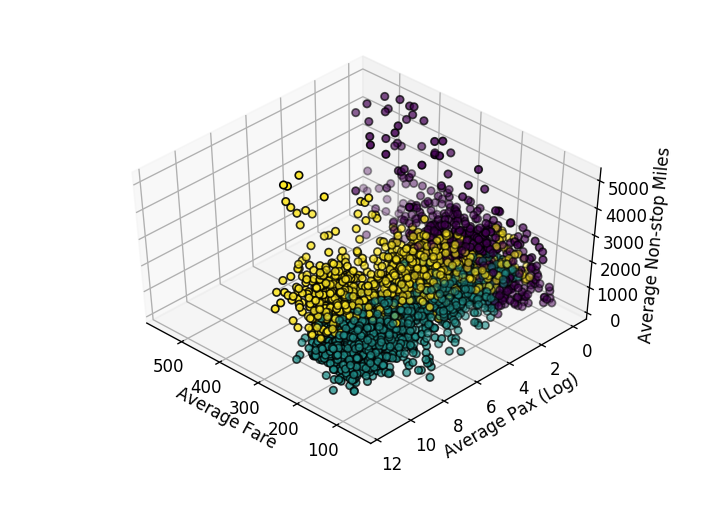

In [130]:
%matplotlib notebook
%matplotlib notebook
route=0
fig = plt.figure(fignum, dpi=120)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = clf[route].predict(X_data[route])
# print(labels)
# labels = k_means.labels_

ax.scatter(X_data[route][:, 0], X_data[route][:, 1], X_data[route][:, 2],
           c=labels.astype(np.float), edgecolor='k')
# plt.scatter(Xdata0_PCA, np.ones_like(Xdata0_PCA[:,0]), np.ones_like(Xdata0_PCA[:,0]), c=labels.astype(np.float))


# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Average Fare')
ax.set_ylabel('Average Pax (Log)')
ax.set_zlabel('Average Non-stop Miles')
# ax.set_title(titles[fignum - 1])
ax.dist = 12
plt.show()
fignum = fignum + 1

In [11]:
# # linalg.eigh(clf.covariances_)
# color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
# linalg.eigh(zip(clf.means_, clf.covariances_,color_iter)[0][1])

In [12]:
# fig = plt.figure(fignum, dpi=120)
# fignum += 1
# clf = gmm(X_data0, range(1,9))

In [13]:
# print(clf.predict(X_data0[:2,:]))
# print(clf.sample(5))
# print(X_data0[:2,:])

In [131]:
route = 0
print(metrics.silhouette_score(X_data[route], clf[route].predict(X_data[route]), metric='euclidean'))
print(metrics.silhouette_score(X_data[route], k_means.labels_, metric='euclidean'))
print(metrics.calinski_harabaz_score(X_data[route], clf[route].predict(X_data[route])))
print(metrics.calinski_harabaz_score(X_data[route], k_means.labels_))
print(clf[route].score(X_data[route][:,:]))
print(clf[route].lower_bound_)

0.3790021180332564
0.5570643396237219
1664.7589126078392
10010.404067032861
-15.662316670315242
-15.662921707347852


In [15]:
# print('AVG_FARE, '+ 'AVG_PAX_log, ' + 'AVG_NONSTOP_MILES')
# print('Weights: ' + str(clf[route].weights_))
# print('Means: ' + str(clf[route].means_))
# print('Covariances: ' + str(clf[route].covariances_))
# # clf[i].covariances_[0]

AVG_FARE, AVG_PAX_log, AVG_NONSTOP_MILES
Weights: [ 0.1459778   0.2911861   0.44696236  0.11587374]
Means: [[  264.63864077     7.15875047  2018.92873094]
 [  212.68746923     4.86598717   677.96920878]
 [  215.92957608     7.36729829   929.01245248]
 [  219.18121433     2.66741422  1783.8459077 ]]
Covariances: [[[  1.21517928e+03   4.49714690e+00   9.06769064e+03]
  [  4.49714690e+00   1.11011164e+00   1.02828384e+02]
  [  9.06769064e+03   1.02828384e+02   1.66181559e+05]]

 [[  2.39316316e+03   7.12484018e+00   1.00601692e+03]
  [  7.12484018e+00   4.49572700e+00  -5.25507285e+01]
  [  1.00601692e+03  -5.25507285e+01   5.33067572e+04]]

 [[  1.50243626e+03  -1.75493711e+01   8.92167448e+03]
  [ -1.75493711e+01   1.10836030e+00  -2.86231949e+01]
  [  8.92167448e+03  -2.86231949e+01   1.20125916e+05]]

 [[  1.00873154e+04   6.47898501e+01   4.31519849e+04]
  [  6.47898501e+01   4.13268205e+00   7.94674304e+02]
  [  4.31519849e+04   7.94674304e+02   8.33597749e+05]]]


In [16]:
# import matplotlib.pyplot as plt
# x, y, z = np.random.multivariate_normal(clf[route].means_[0], clf[route].covariances_[0], 5000).T
# # plt.scatter(x, y, z, 'x')
# # plt.axis('equal')
# # plt.show()
# fig = plt.figure(fignum, dpi=120)
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# ax.scatter(x, y, z,
#            edgecolor='k')

In [17]:
# sep_data[0]['component'] = clf[0].predict(X_data[0])
# sep_data[1]['component'] = clf[1].predict(X_data[1])
# sep_data[2]['component'] = clf[2].predict(X_data[2])
# # data0 = data0.infer_objects()
# sep_data[route].head(5)
# # data0.dtypes

,ITIN_CHOICE,AVG_FARE,AVG_UNIT_COST,AVG_PAX,AVG_NONSTOP_MILES,AVG_PAX_log,component
ALL_POSSIBLE_ROUTES,,,,,,,
1014011298,0,199.626223,0.350837,810,569,6.697034,2
1014010397,0,297.349206,0.234318,443,1269,6.093570,2
1042312892,0,208.451840,0.167836,4402,1242,8.389814,2
1014014683,0,191.303571,0.314127,94,609,4.543295,1
1072111298,0,230.815109,0.147769,5489,1562,8.610501,2


In [133]:
data_ns['component_0'] = clf[0].predict(X_data[0])
data_ns['component_1'] = clf[1].predict(X_data[1])
data_ns['component_2'] = clf[2].predict(X_data[2])
data_ns['mu_0'], data_ns['sig_0'] = data_ns.apply(lambda x: condMVN(clf, x.index, route=0), axis=1)
data_ns.head()

,MKT_PAX_0,MKT_PAX_1,MKT_PAX_2,AVG_NONSTOP_MILES,AVG_FARE_0,AVG_FARE_1,AVG_FARE_2,AVG_FARE_overall,MKT_PAX_0_log,MKT_PAX_1_log,MKT_PAX_2_log,component_0,component_1,component_2
ALL_POSSIBLE_ROUTES,,,,,,,,,,,,,,
1014010257,17,430,27,1834.00,272.478992,273.814045,224.342593,271.432666,2.833213,6.063785,3.295837,2,1,1
1014010397,1599,1502,37,1269.00,279.476566,209.543950,277.162162,238.713973,7.377134,7.314553,3.610918,2,3,0
1014010423,224,2684,6,619.00,203.927917,237.641512,306.833333,234.964128,5.411646,7.895063,1.791759,1,0,2
1014010529,24,830,32,1886.00,244.432692,252.095983,213.187500,249.999533,3.178054,6.721426,3.465736,2,1,1
1014010599,26,315,1,1138.25,353.510256,265.206616,219.000000,274.337061,3.258097,5.752573,0.000000,1,3,0


In [18]:
# data0.keys()
# data0.set_index('ALL_POSSIBLE_ROUTES', inplace=True)
# data0.head(5)

## Preparing the Conditional Multivariate Gaussian Distribution

In [168]:
from numpy.linalg import inv

def condMVN(clf, data, route, seed=None):
    a = 1 # TODO Specify the location of the target variable
    np.random.seed(seed)
    
    component = int(data['component_'+str(route)])
    avg_pax_log = data['MKT_PAX_' + str(route) + '_log']
    avg_nonstop = data.AVG_NONSTOP_MILES
#     avg_pax_log = 1
#     avg_nonstop = 500
    
    mean = clf.means_[component]
    cov = clf.covariances_[component]
    x2 = np.asmatrix([avg_pax_log, avg_nonstop]).T

    mu1 = np.asmatrix(mean[:a]).T
    mu2 = np.asmatrix(mean[a:]).T
    s11 = np.asmatrix(cov[:a,:a])
    s12 = np.asmatrix(cov[:a,a:])
    s21 = np.asmatrix(cov[a:,:a])
    s22 = np.asmatrix(cov[a:,a:])

    mu = mu1 + s12*inv(s22)*(x2 - mu2)
#     print(mu.getA1())
    sig = s11 - s12*inv(s22)*s21

    return np.random.multivariate_normal(mu.getA1(), sig)
#     return mu.getA1(), np.sqrt(sig)

# condMVN(clf, 0, 10, 10, 0)

In [ ]:
# route_0_fare = 
# def condMVN1(route, seed=None):
        

## Sampling fare from the Conditional Distribution for the given route

In [337]:
condMVN(clf[1], data_ns.loc[routeid], route=1)

array([249.87698989])

In [173]:
# route = 0
# sep_data[route].loc[1014011298]
# routeid = 1289213930
routeid = 1330314747
print("Non-stop: "+ str(condMVN(clf[0], data_ns.loc[routeid], route=0)))
print("One-stop: " + str(condMVN(clf[1], data_ns.loc[routeid], route=1)))
print("Two or more: " + str(condMVN(clf[2], data_ns.loc[routeid], route=2)))
# print(random.seed())

Non-stop: [277.31422046]
One-stop: [243.47579379]
Two or more: [247.30177148]


In [307]:
# condMVN(clf[0], data_ns.loc[pred.iloc[0].ROUTES], route=0)
# condMVN(clf[1], data_ns.loc[1014014683], route=1)
# 1468310140
def predWrapper(ticket, route_type=0, seed=None):
#     import pdb; pdb.set_trace()
    try:
        fare = condMVN(clf[route_type], data_ns.loc[ticket.ROUTES], route=route_type, seed=seed)
    except KeyError:
#         import pdb; pdb.set_trace()
         fare = condMVN(clf[route_type], data_ns.loc[int(str(ticket.ROUTES)[5:]+str(ticket.ROUTES)[:5])], route=route_type, seed=seed)
    return fare[0]

## Data Prediction

In [429]:
infile = './data_for_analysis_2014/final_data_db1b_2014_q2.csv'
outfile = './data_for_analysis_2014/final_data_db1b_2014_q2_pred.csv'

pred = pd.read_csv(infile)
print(len(pred))
# pred.head()

## Filtering routes for which we don't have data
# data_ns.index
func = np.vectorize(lambda x: int(str(x)[5:] + str(x)[:5]))
func(data_ns.index)
all_routes = np.append(np.array(data_ns.index), func(data_ns.index))
route_logic = np.in1d(pred.ROUTES.values,all_routes)
pred = pred[route_logic]

# len(pred.ROUTES.values in all_routes)
# pred.ROUTES.values in all_routes
# abc = pred.loc[:5]
tqdm.pandas(desc='Non-Stop', leave=True)
pred['fare_0'] = pred.progress_apply(lambda x: predWrapper(x,0), axis=1)
tqdm.pandas(desc='One-Stop', leave=True)
pred['fare_1'] = pred.progress_apply(lambda x: predWrapper(x,1), axis=1)
tqdm.pandas(desc='Two-Stop', leave=True)
pred['fare_2'] = pred.progress_apply(lambda x: predWrapper(x,2), axis=1)
# abc['red'] = abc.apply(lambda x: predWrapper(x,0), axis=1)
# import pdb; pdb.set_trace()
# abc
# pred.head()

## Scaling fares
pred['route'] = pred['NON_STOP']*0 + pred['ONE_STOP']*1 + pred['TWO_STOP']*2

tqdm.pandas(desc='Non-Stop Scaling', leave=True)
pred['fare_0_scaled'] = pred.progress_apply(lambda x: x['fare_0']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# print("Non-stop fare is done!")
tqdm.pandas(desc='One-Stop Scaling', leave=True)
pred['fare_1_scaled'] = pred.progress_apply(lambda x: x['fare_1']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# print("One-stop fare is done!")
tqdm.pandas(desc='Two-Stop Scaling', leave=True)
pred['fare_2_scaled'] = pred.progress_apply(lambda x: x['fare_2']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# pred.head()

pred.to_csv(outfile, index=False)

3190801


Two-Stop:  53%|█████▎    | 1685816/3163558 [49:45<40:50, 603.13it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Two-Stop:  65%|██████▌   | 2060036/3163558 [1:00:17<31:29, 583.98it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Two-Stop:  77%|███████▋  | 2442363/3163558 [1:11:03<20:24, 588.99it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change

In [430]:
infile = './data_for_analysis_2014/final_data_db1b_2014_q3.csv'
outfile = './data_for_analysis_2014/final_data_db1b_2014_q3_pred.csv'

pred = pd.read_csv(infile)
print(len(pred))
# pred.head()

## Filtering routes for which we don't have data
# data_ns.index
func = np.vectorize(lambda x: int(str(x)[5:] + str(x)[:5]))
func(data_ns.index)
all_routes = np.append(np.array(data_ns.index), func(data_ns.index))
route_logic = np.in1d(pred.ROUTES.values,all_routes)
pred = pred[route_logic]

# len(pred.ROUTES.values in all_routes)
# pred.ROUTES.values in all_routes
# abc = pred.loc[:5]
tqdm.pandas(desc='Non-Stop', leave=True)
pred['fare_0'] = pred.progress_apply(lambda x: predWrapper(x,0), axis=1)
tqdm.pandas(desc='One-Stop', leave=True)
pred['fare_1'] = pred.progress_apply(lambda x: predWrapper(x,1), axis=1)
tqdm.pandas(desc='Two-Stop', leave=True)
pred['fare_2'] = pred.progress_apply(lambda x: predWrapper(x,2), axis=1)
# abc['red'] = abc.apply(lambda x: predWrapper(x,0), axis=1)
# import pdb; pdb.set_trace()
# abc
# pred.head()

## Scaling fares
pred['route'] = pred['NON_STOP']*0 + pred['ONE_STOP']*1 + pred['TWO_STOP']*2

tqdm.pandas(desc='Non-Stop Scaling', leave=True)
pred['fare_0_scaled'] = pred.progress_apply(lambda x: x['fare_0']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# print("Non-stop fare is done!")
tqdm.pandas(desc='One-Stop Scaling', leave=True)
pred['fare_1_scaled'] = pred.progress_apply(lambda x: x['fare_1']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# print("One-stop fare is done!")
tqdm.pandas(desc='Two-Stop Scaling', leave=True)
pred['fare_2_scaled'] = pred.progress_apply(lambda x: x['fare_2']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# pred.head()

pred.to_csv(outfile, index=False)

3450918


Non-Stop:   5%|▍         | 167484/3418179 [05:05<1:41:36, 533.22it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Non-Stop:  15%|█▌        | 518919/3418179 [15:33<1:24:59, 568.51it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Non-Stop:  25%|██▌       | 870907/3418179 [26:06<1:17:59, 544.38it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change th

One-Stop:  14%|█▍        | 488016/3418179 [17:34<1:58:14, 412.99it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

One-Stop:  17%|█▋        | 597349/3418179 [22:11<3:01:29, 259.05it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

One-Stop:  21%|██▏       | 732319/3418179 [28:18<1:49:38, 408.28it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change th

Two-Stop:  15%|█▍        | 499991/3418179 [13:51<1:22:37, 588.67it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Two-Stop:  19%|█▉        | 658050/3418179 [18:15<1:18:08, 588.69it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Two-Stop:  26%|██▌       | 893492/3418179 [24:48<1:10:05, 600.26it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change th

In [431]:
infile = './data_for_analysis_2014/final_data_db1b_2014_q4.csv'
outfile = './data_for_analysis_2014/final_data_db1b_2014_q4_pred.csv'

pred = pd.read_csv(infile)
print(len(pred))
# pred.head()

## Filtering routes for which we don't have data
# data_ns.index
func = np.vectorize(lambda x: int(str(x)[5:] + str(x)[:5]))
func(data_ns.index)
all_routes = np.append(np.array(data_ns.index), func(data_ns.index))
route_logic = np.in1d(pred.ROUTES.values,all_routes)
pred = pred[route_logic]

# len(pred.ROUTES.values in all_routes)
# pred.ROUTES.values in all_routes
# abc = pred.loc[:5]
tqdm.pandas(desc='Non-Stop', leave=True)
pred['fare_0'] = pred.progress_apply(lambda x: predWrapper(x,0), axis=1)
tqdm.pandas(desc='One-Stop', leave=True)
pred['fare_1'] = pred.progress_apply(lambda x: predWrapper(x,1), axis=1)
tqdm.pandas(desc='Two-Stop', leave=True)
pred['fare_2'] = pred.progress_apply(lambda x: predWrapper(x,2), axis=1)
# abc['red'] = abc.apply(lambda x: predWrapper(x,0), axis=1)
# import pdb; pdb.set_trace()
# abc
# pred.head()

## Scaling fares
pred['route'] = pred['NON_STOP']*0 + pred['ONE_STOP']*1 + pred['TWO_STOP']*2

tqdm.pandas(desc='Non-Stop Scaling', leave=True)
pred['fare_0_scaled'] = pred.progress_apply(lambda x: x['fare_0']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# print("Non-stop fare is done!")
tqdm.pandas(desc='One-Stop Scaling', leave=True)
pred['fare_1_scaled'] = pred.progress_apply(lambda x: x['fare_1']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# print("One-stop fare is done!")
tqdm.pandas(desc='Two-Stop Scaling', leave=True)
pred['fare_2_scaled'] = pred.progress_apply(lambda x: x['fare_2']/x['fare_' + str(x['route'])]*x['MARKET_FARE'], axis=1)
# pred.head()

pred.to_csv(outfile, index=False)

3468787


Non-Stop:   5%|▌         | 180991/3431893 [05:04<1:32:43, 584.35it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Non-Stop:  17%|█▋        | 583589/3431893 [16:18<1:20:08, 592.37it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Non-Stop:  29%|██▊       | 983131/3431893 [27:25<1:06:06, 617.29it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change th

In [379]:
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_pandas, tqdm_notebook
import pdb
tqdm.pandas(desc='Testing', leave=True)

In [417]:
sum(pred.ROUTES.value_counts()[:1000])*1.0/len(pred)

0.5594032479561091

In [421]:
from scipy import stats

true_mean = []
true_std = []
pred_mean = []
pred_std = []
for route_id in pred.ROUTES.value_counts().index[:1000]:
    sample_true = pred[(pred['MARKET_FARE']>0) & (pred['ONE_STOP']==1) & (pred['ROUTES']==route_id)]
    sample_pred = pred[(pred['MARKET_FARE']>0) & (pred['ONE_STOP']==0) & (pred['ROUTES']==route_id)]
# slope, intercept, r_value, p_value, std_err = stats.linregress(sample_pred.MARKET_FARE, sample_pred.fare_2*15)
# print(slope)
# print(intercept)
# # plt.plot(x, y, 'o', label='original data')
# plt.plot(sample_pred.MARKET_FARE, intercept + slope*sample_pred.MARKET_FARE*15, 'r', label='fitted line')
# plt.scatter(sample_pred.MARKET_FARE, sample_pred.fare_2*15, alpha=0.2)
# plt.axes().set_aspect('equal')
# plt.show()
    x = sample_true.MARKET_FARE
    y = sample_pred.fare_1_scaled*1


# x = x[:,np.newaxis]
# x = np.vstack([x, np.ones(len(x))]).T
# import pdb; pdb.set_trace()
# a, b, c, d = np.linalg.lstsq(x, y)
# print(a)
# print(b)
# print(c)
# print(d)
#     import pdb; pdb.set_trace()
    true_mean.append(np.mean(x))
    true_std.append(np.std(x))
    pred_mean.append(np.mean(y))
    pred_std.append(np.std(y))
# print("True Mean:" + str(np.mean(x)))
# print("True Std: " + str(np.std(x)))
# print("Pred Mean:" + str(np.mean(y)))
# print("Pred Std: " + str(np.std(y)))

# plt.plot(true_mean, pred_mean, 'bo', alpha=0.2)
# plt.plot(x, a*x, 'r-')
# plt.show()

<IPython.core.display.Javascript object>


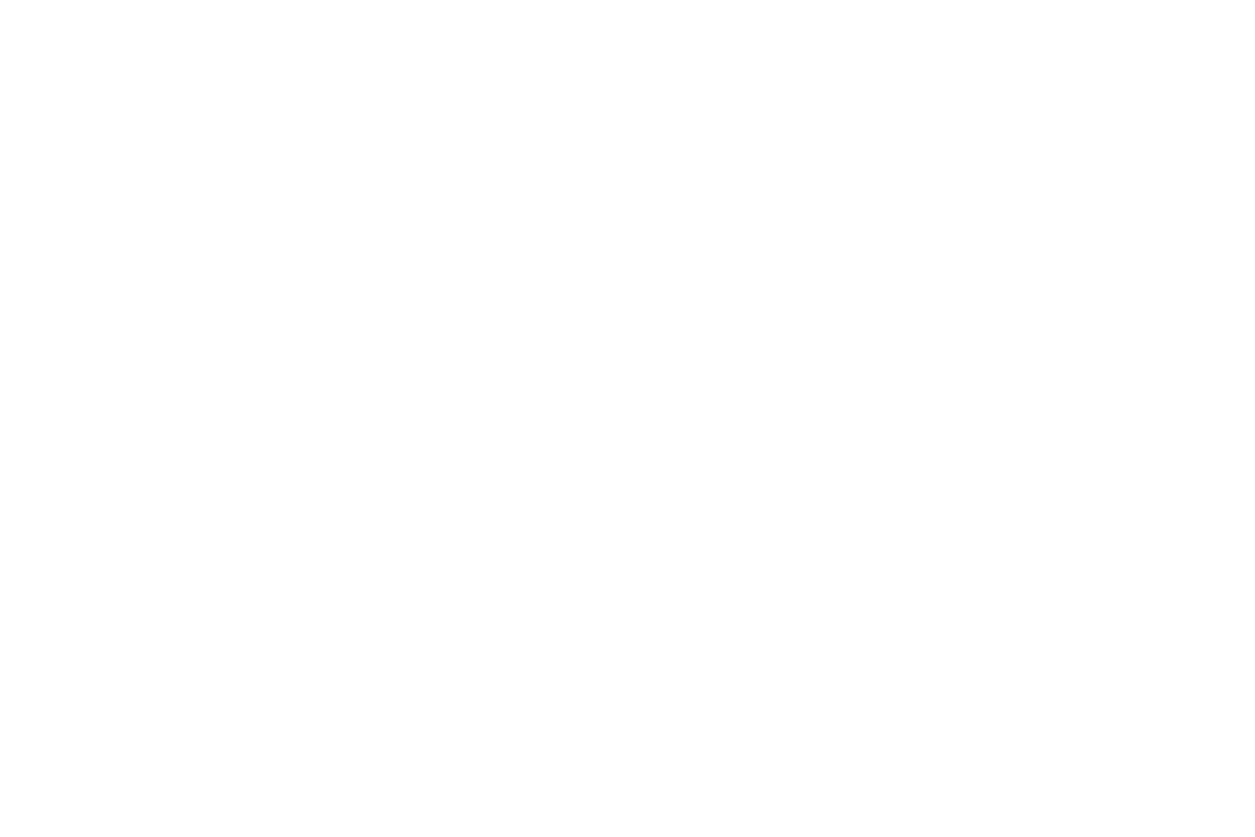

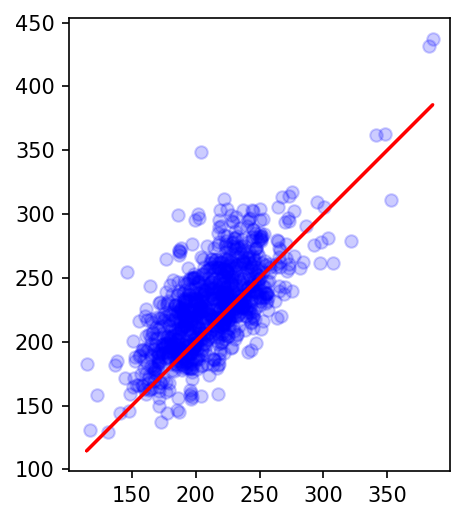

In [422]:
plt.figure(dpi=150)
plt.plot(true_mean, pred_mean, 'bo', alpha=0.2)
plt.plot(true_mean, true_mean, 'r-')
plt.axes().set_aspect('equal')
plt.show()

In [99]:
from sklearn.decomposition import PCA
print(data_ns.shape)
pca = PCA(2, whiten=True)
data_ns_PCA = pca.fit_transform(data_ns)
print(data_ns_PCA.shape)
print(pca.components_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(data_ns.iloc[0])
print(pca.inverse_transform(data_ns_PCA[:1,:]))
import pdb; pdb.set_trace()

print(data_ns_PCA[:1,:])
print(np.dot(data_ns.iloc[0], pca.components_[0]) + np.dot(data_ns.iloc[0], pca.components_[1]))
# print(pca)
print(pca.transform(data_ns.iloc[0]))

(3496, 11)
(3496, 2)
[[ 9.98641963e-01  5.11602444e-02  5.33563139e-03 -7.99693379e-03
  -4.53982169e-04 -1.54166512e-03 -4.91172939e-04 -1.24417655e-03
   2.49047667e-04  3.83555430e-05  5.39857302e-05]
 [-4.48457065e-02  9.27969837e-01  4.92099752e-02  3.66348670e-01
   1.17783855e-02  4.91222172e-03  1.83088172e-03  7.74928997e-03
   4.99580256e-04  7.52127287e-04  8.91556308e-04]]
[0.97156575 0.02020882]
[447424.64095403  64528.90029837]
MKT_PAX_0              17.000000
MKT_PAX_1             430.000000
MKT_PAX_2              27.000000
AVG_NONSTOP_MILES    1834.000000
AVG_FARE_0            272.478992
AVG_FARE_1            273.814045
AVG_FARE_2            224.342593
AVG_FARE_overall      271.432666
MKT_PAX_0_log           2.833213
MKT_PAX_1_log           6.063785
MKT_PAX_2_log           3.295837
Name: 1014010257, dtype: float64
[[  -1.85550365  692.66609104   22.18696312 1169.58374258  224.38454636
   236.68698055  259.73531806  237.4891174     4.18527134    6.19298664
     2.6015484

BdbQuit: 

In [ ]:
# fig = plt.figure(fignum, dpi=120)
# fignum += 1
# # plot()

# def gmm_test(X, n_components_range):
#     lowest_bic = np.infty
#     bic = []
# #     n_components_range = range(1, 5)
#     cv_types = ['spherical', 'tied', 'diag', 'full']

#     for cv_type in cv_types:
#         for n_components in n_components_range:
#             # Fit a Gaussian mixture with EM
#             gmm = mixture.GaussianMixture(n_components=n_components,
#                                           covariance_type=cv_type, init_params='kmeans', verbose=0)
#             gmm.fit(X)
#             bic.append(gmm.bic(X))
#             if bic[-1] < lowest_bic:
#                 lowest_bic = bic[-1]
#                 best_gmm = gmm

#     bic = np.array(bic)
#     color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
#                                   'darkorange'])
#     clf = best_gmm
#     bars = []

#     # Plot the BIC scores
#     spl = plt.subplot(2, 1, 1)
#     for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#         xpos = np.array(n_components_range) + .2 * (i - 2)
#         bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                       (i + 1) * len(n_components_range)],
#                             width=.2, color=color))

#     plt.xticks(n_components_range)
#     plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
#     plt.title('BIC score per model')
#     xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#         .2 * np.floor(bic.argmin() / len(n_components_range))
#     plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
#     spl.set_xlabel('Number of components')
#     spl.legend([b[0] for b in bars], cv_types)

#     # Plot the winner
#     splot = plt.subplot(2, 1, 2)
#     Y_ = clf.predict(X)
#     for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
#                                                color_iter)):
# #         v, w = linalg.eigh(cov)
#         if not np.any(Y_ == i):
#             continue
        
#         plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#         # Plot an ellipse to show the Gaussian component
# #         angle = np.arctan2(w[0][1], w[0][0])
# #         angle = 180. * angle / np.pi  # convert to degrees
# #         v = 2. * np.sqrt(2.) * np.sqrt(v)
# #         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180+angle, color=color)
# #         ell.set_clip_box(splot.bbox)
# #         ell.set_alpha(.5)
# #         splot.add_artist(ell)

#     plt.xticks(())
#     plt.yticks(())
# #     plt.title('Selected GMM: full model, 4 components')
#     plt.subplots_adjust(hspace=.35, bottom=.02)
#     plt.show()
#     return clf

# clf_PCA = gmm_test(Xdata0_PCA, range(1,9))

In [ ]:
# print(metrics.silhouette_score(X_data0, clf_PCA.predict(Xdata0_PCA), metric='euclidean'))
# print(metrics.calinski_harabaz_score(Xdata0_PCA, clf_PCA.predict(Xdata0_PCA)))
# print(clf_PCA.score(Xdata0_PCA[:,:]))
# print(clf_PCA.lower_bound_)
# print(pca.inverse_transform(Xdata0_PCA[:2,:]))
# print(X_data0[:2,:])

In [ ]:
# # BayesianGaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weight_concentration_prior_type=’dirichlet_process’, weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

# def bgmm(X, n_components_range):
#     lowest_bic = np.infty
#     bic = []
# #     n_components_range = range(1, 5)
#     cv_types = ['diag']#, 'spherical', 'tied']#, 'diag', 'full']

#     for cv_type in cv_types:
#         for n_components in n_components_range:
#             # Fit a Gaussian mixture with EM
#             gmm = mixture.BayesianGaussianMixture(n_components=n_components,
#                                           covariance_type=cv_type, init_params='kmeans', verbose=1)
#             gmm.fit(X_data0)
#             best_gmm = gmm
# #             bic.append(gmm.bic(X))
# #             if bic[-1] < lowest_bic:
# #                 lowest_bic = bic[-1]
# #                 best_gmm = gmm

# #     bic = np.array(bic)
#     color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
#                                   'darkorange'])
#     clf = best_gmm
#     bars = []

#     # Plot the BIC scores
# #     spl = plt.subplot(2, 1, 1)
# #     for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
# #         xpos = np.array(n_components_range) + .2 * (i - 2)
# #         bars.append(plt.bar(xpos, bic[i * len(n_components_range):
# #                                       (i + 1) * len(n_components_range)],
# #                             width=.2, color=color))

# #     plt.xticks(n_components_range)
# #     plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
# #     plt.title('BIC score per model')
# #     xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
# #         .2 * np.floor(bic.argmin() / len(n_components_range))
# #     plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
# #     spl.set_xlabel('Number of components')
# #     spl.legend([b[0] for b in bars], cv_types)

# #     # Plot the winner
# #     splot = plt.subplot(2, 1, 2)
# #     Y_ = clf.predict(X)
# #     for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
# #                                                color_iter)):
# #         v, w = linalg.eigh(cov)
# #         if not np.any(Y_ == i):
# #             continue
# #         plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

# #         # Plot an ellipse to show the Gaussian component
# #         angle = np.arctan2(w[0][1], w[0][0])
# #         angle = 180. * angle / np.pi  # convert to degrees
# #         v = 2. * np.sqrt(2.) * np.sqrt(v)
# #         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180+angle, color=color)
# #         ell.set_clip_box(splot.bbox)
# #         ell.set_alpha(.5)
# #         splot.add_artist(ell)

# #     plt.xticks(())
# #     plt.yticks(())
# # #     plt.title('Selected GMM: full model, 4 components')
# #     plt.subplots_adjust(hspace=.35, bottom=.02)
# #     plt.show()
#     return clf

In [ ]:
# import numpy as np

# from sklearn.cluster import DBSCAN
# from sklearn import metrics
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.preprocessing import StandardScaler

# def dbscan(X):
# # #############################################################################
# # Compute DBSCAN
#     db = DBSCAN(eps=0.5).fit(X)
#     core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#     core_samples_mask[db.core_sample_indices_] = True
#     labels = db.labels_

#     # Number of clusters in labels, ignoring noise if present.
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#     print('Estimated number of clusters: %d' % n_clusters_)
# #     print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# #     print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# #     print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# #     print("Adjusted Rand Index: %0.3f"
# #           % metrics.adjusted_rand_score(labels_true, labels))
# #     print("Adjusted Mutual Information: %0.3f"
# #           % metrics.adjusted_mutual_info_score(labels_true, labels))
# #     print("Silhouette Coefficient: %0.3f"
# #           % metrics.silhouette_score(X, labels))

#     # #############################################################################
#     # Plot result
#     import matplotlib.pyplot as plt

#     # Black removed and is used for noise instead.
#     unique_labels = set(labels)
#     colors = [plt.cm.Spectral(each)
#               for each in np.linspace(0, 1, len(unique_labels))]
#     for k, col in zip(unique_labels, colors):
#         if k == -1:
#             # Black used for noise.
#             col = [0, 0, 0, 1]

#         class_member_mask = (labels == k)

#         xy = X[class_member_mask & core_samples_mask]
#         plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#                  markeredgecolor='k', markersize=5)

#         xy = X[class_member_mask & ~core_samples_mask]
#         plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#                  markeredgecolor='k', markersize=2)

#     plt.title('Estimated number of clusters: %d' % n_clusters_)
#     plt.show()
#     return db

In [ ]:
# fig = plt.figure(fignum, dpi=120)
# fignum += 1
# clf = dbscan(X_data0)

In [ ]:
# fig = plt.figure(fignum, dpi=120)
# fignum += 1
# bclf = bgmm(X_data0, range(1,5))

In [ ]:
# print(k_means.labels_[::10])

In [ ]:
# # Loading the dataset
# iris = datasets.load_iris()
# X_iris = iris.data
# y_iris = iris.target

In [ ]:
# k_means = cluster.KMeans(n_clusters=3)
# k_means.fit(X_iris)

In [ ]:
# print(k_means.labels_[::10])
# print(y_iris[::10])

In [ ]:
# print(iris.DESCR)

In [ ]:
# # Code source: Gaël Varoquaux
# # Modified for documentation by Jaques Grobler
# # License: BSD 3 clause

# import numpy as np
# import matplotlib.pyplot as plt
# # Though the following import is not directly being used, it is required
# # for 3D projection to work
# from mpl_toolkits.mplot3d import Axes3D

# from sklearn.cluster import KMeans
# from sklearn import datasets

# np.random.seed(5)

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
#               ('k_means_iris_3', KMeans(n_clusters=3)),
#               ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
#                                                init='random'))]

In [ ]:
# X

In [ ]:
# fignum = 1
# titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
# for name, est in estimators:
#     fig = plt.figure(fignum, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#     est.fit(X)
#     labels = est.labels_

#     ax.scatter(X[:, 3], X[:, 0], X[:, 2],
#                c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])
#     ax.set_xlabel('Petal width')
#     ax.set_ylabel('Sepal length')
#     ax.set_zlabel('Petal length')
#     ax.set_title(titles[fignum - 1])
#     ax.dist = 12
#     fignum = fignum + 1

In [ ]:
# # Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# for name, label in [('Setosa', 0),
#                     ('Versicolour', 1),
#                     ('Virginica', 2)]:
#     ax.text3D(X[y == label, 3].mean(),
#               X[y == label, 0].mean(),
#               X[y == label, 2].mean() + 2, name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Petal width')
# ax.set_ylabel('Sepal length')
# ax.set_zlabel('Petal length')
# ax.set_title('Ground Truth')
# ax.dist = 12

In [432]:
import rpy2

ImportError: No module named rpy2